<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/transformers_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 10th Nov, 2022
# Ref:
#  https://www.kaggle.com/code/truthr/a-gentle-introduction-to-the-hugging-face-api
#  https://huggingface.co/docs/transformers/quicktour

# Hugging face dataset from csv file:
# Ref: https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-local-files
# From pandas dataframe:
#  https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html#from-a-pandas-dataframe
# Process datasets:
# https://huggingface.co/docs/datasets/process

# Hugging face
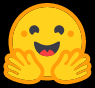

Hugging face models<br>
List is [here](https://huggingface.co/models?sort=downloads)<br>
Wikipedia [Transformers](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model))


In [ ]:
# 1.0 Install transformers and datasets:

!pip install transformers datasets

In [2]:
# Call libraries:
# 1.1 Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset

# 1.2 General
import numpy as np
import pandas as pd
import re


# 1.3 To display youtube videos
from IPython.display import YouTubeVideo


In [6]:
# 1.4 Display multiple commands outputs from a cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Text classification

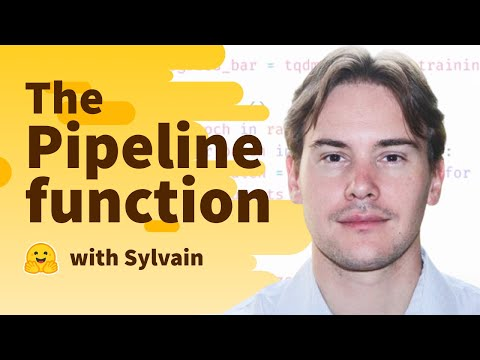

In [ ]:
# 1.3 Display Transformers, Quick Start video:

YouTubeVideo('tiZFewofSLM')

## What is a pipeline?<br>


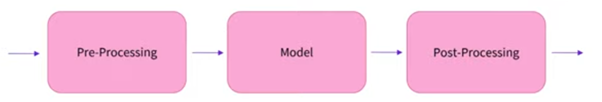

## Sentiment analysis
Text Classification


Start with creating an object to perform sentiment analysis<br>
Details about Pipeline class are [here](https://huggingface.co/docs/transformers/main_classes/pipelines). API of text-classification pipeline is [here](https://huggingface.co/docs/transformers/v4.24.0/en/main_classes/pipelines#transformers.TokenClassificationPipeline).<br>  And list of pre-trained models is [here](https://huggingface.co/models?sort=downloads)

In [ ]:
# 2.0 Instantiate 'pipeline' for sentiment-anaysis
#     Once instantiated, 'classifier' object
#     can be used for sentiment analysis:

classifier = pipeline("sentiment-analysis")

Ref for other models is [here](https://huggingface.co/siebert/sentiment-roberta-large-english?text=I+like+you.+I+love+you)

In [55]:
# 2.0.1 Can use other models also:

#classifier1 = pipeline("sentiment-analysis",
#                         model="siebert/sentiment-roberta-large-english"
#                        )

classifier2 = pipeline("sentiment-analysis",
                       model="Remicm/sentiment-analysis-model-for-socialmedia"
                       )  # Label_1 is +ve; Label_0 is -ve

In [ ]:
# 2.1 Discover sentiment of a sentence:
#      emoji inserted in the sentece is just an image,
#       inserted within the sentence. emoji acts just
#        like a printed letter: 
#         😎 😀 😭 🤣 😂 🙂 😇 😠 🤐 😒

classifier("We are very happy to show you the 🤗 Transformers library.")
print("\n===========")
classifier2("We are very happy to show you the 🤗 Transformers library.")


In [56]:
# 2.2 Find entiments of multiple sentences.
#     Collect all the sentences in a list:

lu = [
      "We are very happy to show you the 🤗 Transformers library.",
      "We hope you don't hate it."
      ]

# 2.3 Get results for all at once:

results = classifier(lu)
results2 = classifier2(lu)

In [ ]:
# 2.4 results is a list of dictionaries:

results
print("\n=======")
results2

In [ ]:
# 2.5 Get results for each:
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

## Mount gdrive

In [34]:
# 3.0

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Read drugs dataset from gdrive
Drugs Review dataset at [UCI repo](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

In [35]:
# 4.0 Path to folder in gdrive where data files are: 

pathToFolder = "/gdrive/MyDrive/Colab_data_files/drugs_raw/"

In [36]:
# 4.1 One of the files (train):

drug = "drugsComTrain_raw.tsv"

In [37]:
# 4.2 Read dataset in pandas:

data = pd.read_csv(pathToFolder + drug, sep = "\t")

## Explore and clean data

In [ ]:
# 5.0 Our data:

data.head()

In [ ]:
# 5.1 Shape:
 
data.shape   # (161297, 7)

In [ ]:
# 5.2 Rename unnamed to patientid:

data = data.rename({'Unnamed: 0' : 'patientid'}, axis = 1)
data.head(3)

In [ ]:
# 5.3 Remove quptation marks from 'review' column:

data['review'] = data['review'].str.replace('"', '')
data.head(3)


## Transform pandas dataframe to Hugging Face Dataset
See [here](https://huggingface.co/course/chapter5/3#time-to-slice-and-dice) for dataset operations

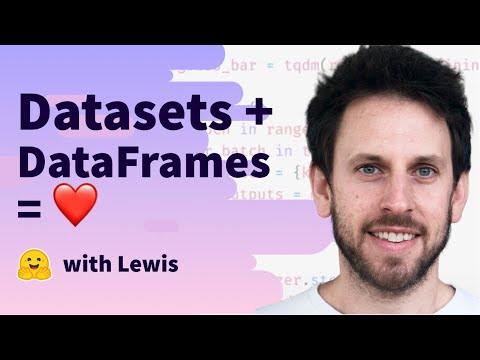

In [ ]:
YouTubeVideo('tfcY1067A5Q')

In [42]:
# 6.0 Transform pandas dataframe to hugging face dataset:

dataset = Dataset.from_pandas(data)

In [ ]:
# 6.1 Look at first few rows:

dataset[:3]

In [ ]:
# 6.2 Look at 3 rows of column of interest:

dataset['review'][:3]

In [ ]:
# 6.3 Take a sample of dataset
#     select(range(1000)) will select top 1000 rows.
#     Hence shuffle is a must to take a sample:

drug_sample = dataset.shuffle(seed=42).select(range(1000))
drug_sample.shape  # (1000, 7)

In [ ]:
# 6.4 Column names of data:

drug_sample.column_names

In [ ]:
# 6.5 Classify five of the reviews:

classifier(drug_sample['review'][:5])
print("\n=====\n")
classifier2(drug_sample['review'][:5])

In [ ]:
drug_sample['review'][:5]

## Read data directly as Dataset class

In [48]:
# 7.0 Data can be read directly from disk as 'Dataset' class:

data_files = {"train": pathToFolder + "drugsComTrain_raw.tsv", "test": pathToFolder +"drugsComTest_raw.tsv"}

In [ ]:
# 7.1 Load dataset now:
# \t is the tab character in Python

drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

In [50]:
# 7.2 Here is train dataset:

train = drug_dataset['train']

In [ ]:
# 7.3 Check:

train[:3]

In [ ]:
# 7.4 Transform dataset to pandas:

dataset.to_pandas().head()

In [ ]:
# For further operations on dataset, please see:
#  https://huggingface.co/course/chapter5/3#time-to-slice-and-dice

# Question Answering
Text is at [this link](https://github.com/harnalashok/deeplearning/blob/main/about%20football.txt)

In [ ]:
# https://www.kaggle.com/code/truthr/a-gentle-introduction-to-the-hugging-face-api

In [ ]:
# 8.0 Instantiate question-answer object:

question_answerer = pipeline("question-answering")

In [ ]:
# 8.1 Let the object study context and answer question:

question_answerer(
    question="Where did football originate?",
    context="football, also called association football or soccer, game in which two teams of 11 players, using any part of their bodies except their hands and arms, try to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to handle the ball and may do so only within the penalty area surrounding the goal. The team that scores more goals wins. Football is the world’s most popular ball game in numbers of participants and spectators. Simple in its principal rules and essential equipment, the sport can be played almost anywhere, from official football playing fields (pitches) to gymnasiums, streets, school playgrounds, parks, or beaches. Football’s governing body, the Fédération Internationale de Football Association (FIFA), estimated that at the turn of the 21st century there were approximately 250 million football players and over 1.3 billion people interested in football; in 2010 a combined television audience of more than 26 billion watched football’s premier tournament, the quadrennial month-long World Cup finals. The early years: Modern football originated in Britain in the 19th century. Since before medieval times, “folk football” games had been played in towns and villages according to local customs and with a minimum of rules. Industrialization and urbanization, which reduced the amount of leisure time and space available to the working class, combined with a history of legal prohibitions against particularly violent and destructive forms of folk football to undermine the game’s status from the early 19th century onward. However, football was taken up as a winter game between residence houses at public (independent) schools such as Winchester, Charterhouse, and Eton. Each school had its own rules; some allowed limited handling of the ball and others did not. The variance in rules made it difficult for public schoolboys entering university to continue playing except with former schoolmates. As early as 1843 an attempt to standardize and codify the rules of play was made at the University of Cambridge, whose students joined most public schools in 1848 in adopting these “Cambridge rules,” which were further spread by Cambridge graduates who formed football clubs. In 1863 a series of meetings involving clubs from metropolitan London and surrounding counties produced the printed rules of football, which prohibited the carrying of the ball. Thus, the “handling” game of rugby remained outside the newly formed Football Association (FA). Indeed, by 1870 all handling of the ball except by the goalkeeper was prohibited by the FA. The new rules were not universally accepted in Britain, however; many clubs retained their own rules, especially in and around Sheffield. Although this northern English city was the home of the first provincial club to join the FA, in 1867 it also gave birth to the Sheffield Football Association, the forerunner of later county associations. Sheffield and London clubs played two matches against each other in 1866, and a year later a match pitting a club from Middlesex against one from Kent and Surrey was played under the revised rules. In 1871 15 FA clubs accepted an invitation to enter a cup competition and to contribute to the purchase of a trophy. By 1877 the associations of Great Britain had agreed upon a uniform code, 43 clubs were in competition, and the London clubs’ initial dominance had diminished. The development of modern football was closely tied to processes of industrialization and urbanization in Victorian Britain. Most of the new working-class inhabitants of Britain’s industrial towns and cities gradually lost their old bucolic pastimes, such as badger-baiting, and sought fresh forms of collective leisure. From the 1850s onward, industrial workers were increasingly likely to have Saturday afternoons off work, and so many turned to the new game of football to watch or to play. Key urban institutions such as churches, trade unions, and schools organized working-class boys and men into recreational football teams. Rising adult literacy spurred press coverage of organized sports, while transport systems such as the railways or urban trams enabled players and spectators to travel to football games. Average attendance in England rose from 4,600 in 1888 to 7,900 in 1895, rising to 13,200 in 1905 and reaching 23,100 at the outbreak of World War I. Football’s popularity eroded public interest in other sports, notably cricket. Leading clubs, notably those in Lancashire, started charging admission to spectators as early as the 1870s and so, despite the FA’s amateurism rule, were in a position to pay illicit wages to attract highly skilled working-class players, many of them hailing from Scotland. Working-class players and northern English clubs sought a professional system that would provide, in part, some financial reward to cover their “broken time” (time lost from their other work) and the risk of injury. The FA remained staunchly elitist in sustaining a policy of amateurism that protected upper and upper-middle class influence over the game. The issue of professionalism reached a crisis in England in 1884, when the FA expelled two clubs for using professional players. However, the payment of players had become so commonplace by then that the FA had little option but to sanction the practice a year later, despite initial attempts to restrict professionalism to reimbursements for broken time. The consequence was that northern clubs, with their large supporter bases and capacity to attract better players, came to prominence. As the influence of working-class players rose in football, the upper classes took refuge in other sports, notably cricket and rugby union. Professionalism also sparked further modernization of the game through the establishment of the Football League, which allowed the leading dozen teams from the North and Midlands to compete systematically against each other from 1888 onward. A lower, second division was introduced in 1893, and the total number of teams increased to 28. The Irish and Scots formed leagues in 1890. The Southern League began in 1894 but was absorbed by the Football League in 1920. Yet football did not become a major profit-making business during this period. Professional clubs became limited liability companies primarily to secure land for gradual development of stadium facilities. Most clubs in England were owned and controlled by businessmen but shareholders received very low, if any, dividends; their main reward was an enhanced public status through running the local club. Later national leagues overseas followed the British model, which included league championships, at least one annual cup competition, and a hierarchy of leagues that sent clubs finishing highest in the tables (standings) up to the next higher division (promotion) and clubs at the bottom down to the next lower division (relegation). A league was formed in the Netherlands in 1889, but professionalism arrived only in 1954. Germany completed its first national championship season in 1903, but the Bundesliga, a comprehensive and fully professional national league, did not evolve until 60 years later. In France, where the game was introduced in the 1870s, a professional league did not begin until 1932, shortly after professionalism had been adopted in the South American countries of Argentina and Brazil. By the early 20th century, football had spread across Europe, but it was in need of international organization. A solution was found in 1904, when representatives from the football associations of Belgium, Denmark, France, the Netherlands, Spain, Sweden, and Switzerland founded the Fédération Internationale de Football Association (FIFA). Although Englishman Daniel Woolfall was elected FIFA president in 1906 and all of the home nations (England, Scotland, Ireland, and Wales) were admitted as members by 1911, British football associations were disdainful of the new body. FIFA members accepted British control over the rules of football via the International Board, which had been established by the home nations in 1882. Nevertheless, in 1920 the British associations resigned their FIFA memberships after failing to persuade other members that Germany, Austria, and Hungary should be expelled following World War I. The British associations rejoined FIFA in 1924 but soon after insisted upon a very rigid definition of amateurism, notably for Olympic football. Other nations again failed to follow their lead, and the British resigned once more in 1928, remaining outside FIFA until 1946. When FIFA established the World Cup championship, British insouciance toward the international game continued. Without membership in FIFA, the British national teams were not invited to the first three competitions (1930, 1934, and 1938). For the next competition, held in 1950, FIFA ruled that the two best finishers in the British home nations tournament would qualify for World Cup play; England won, but Scotland (which finished second) chose not to compete for the World Cup. Despite sometimes fractious international relations, football continued to rise in popularity. It made its official Olympic debut at the London Games in 1908, and it has since been played in each of the Summer Games (except for the 1932 Games in Los Angeles). FIFA also grew steadily—especially in the latter half of the 20th century, when it strengthened its standing as the game’s global authority and regulator of competition. Guinea became FIFA’s 100th member in 1961; at the turn of the 21st century, more than 200 nations were registered FIFA members, which is more than the number of countries that belong to the United Nations. The World Cup finals remain football’s premier tournament, but other important tournaments have emerged under FIFA guidance. Two different tournaments for young players began in 1977 and 1985, and these became, respectively, the World Youth Championship (for those 20 years old and younger) and the Under-17 World Championship. Futsal, the world indoor five-a-side championship, started in 1989. Two years later the first Women’s World Cup was played in China. In 1992 FIFA opened the Olympic football tournament to players aged under 23 years, and four years later the first women’s Olympic football tournament was held. The World Club Championship debuted in Brazil in 2000. The Under-19 Women’s World Championship was inaugurated in 2002. FIFA membership is open to all national associations. They must accept FIFA’s authority, observe the laws of football, and possess a suitable football infrastructure (i.e., facilities and internal organization). FIFA statutes require members to form continental confederations. The first of these, the Confederación Sudamericana de Fútbol (commonly known as CONMEBOL), was founded in South America in 1916. In 1954 the Union of European Football Associations (UEFA) and the Asian Football Confederation (AFC) were established. Africa’s governing body, the Confédération Africaine de Football (CAF), was founded in 1957. The Confederation of North, Central American and Caribbean Association Football (CONCACAF) followed four years later. The Oceania Football Confederation (OFC) appeared in 1966. These confederations may organize their own club, international, and youth tournaments, elect representatives to FIFA’s Executive Committee, and promote football in their specific continents as they see fit. In turn, all football players, agents, leagues, national associations, and confederations must recognize the authority of FIFA’s Arbitration Tribunal for Football, which effectively functions as football’s supreme court in serious disputes. Until the early 1970s, control of FIFA (and thus of world football) was firmly in the hands of northern Europeans. Under the presidencies of the Englishmen Arthur Drewry (1955–61) and Stanley Rous (1961–74), FIFA adopted a rather conservative patrician relationship to the national and continental bodies. It survived on modest income from the World Cup finals, and relatively little was done to promote football in developing countries or to explore the game’s business potential within the West’s postwar economic boom. FIFA’s leadership was more concerned with matters of regulation, such as confirming amateur status for Olympic competition or banning those associated with illegal transfers of players with existing contracts. For example, Colombia (1951–54) and Australia (1960–63) were suspended temporarily from FIFA after permitting clubs to recruit players who had broken contracts elsewhere in the world. Growing African and Asian membership within FIFA undermined European control. In 1974 Brazilian João Havelange was elected president, gaining large support from developing nations. Under Havelange, FIFA was transformed from an international gentlemen’s club into a global corporation: billion-dollar television deals and partnerships with major transnational corporations were established during the 1980s and ’90s. While some earnings were reinvested through FIFA development projects—primarily in Asia, Africa, and Central America—the biggest political reward for developing countries has been the expansion of the World Cup finals to include more countries from outside Europe and South America. Greater professionalization of sports also forced FIFA to intercede in new areas as a governing body and competition regulator. The use of performance-enhancing drugs by teams and individual players had been suspected since at least the 1930s; FIFA introduced drug tests in 1966, and occasionally drug users were uncovered, such as Willie Johnston of Scotland at the 1978 World Cup finals. But FIFA regulations were tightened in the 1980s after the sharp rise in offenses among Olympic athletes, the appearance of new drugs such as the steroid nandrolone, and the use of drugs by stars such as Argentina’s Diego Maradona in 1994. While FIFA has authorized lengthy worldwide bans of players who fail drug tests, discrepancies remain between nations and confederations over the intensity of testing and the legal status of specific drugs. As the sport moved into the 21st century, FIFA came under pressure to respond to some of the major consequences of globalization for international football. During the corrupt tenure of Switzerland’s Sepp Blatter as president from 1998 to 2015, the political bargaining and wrangling among world football’s officials gained greater media and public attention. Direct conflicts of interest among football’s various groups have also arisen: players, agents, television networks, competition sponsors, clubs, national bodies, continental associations, and FIFA all have divergent views regarding the staging of football tournaments and the distribution of football’s income. Regulation of player representatives and transfers is also problematic. In UEFA countries, players move freely when not under contract. On other continents, notably Africa and Central and South America, players tend to be tied into long-term contracts with clubs that can control their entire careers. FIFA now requires all agents to be licensed and to pass written examinations held by national associations, but there is little global consistency regarding the control of agent powers. In Europe, agents have played a key role in promoting wage inflation and higher player mobility. In Latin America, players are often partially “owned” by agents who may decide on whether transfers proceed. In parts of Africa, some European agents have been compared to slave traders in the way that they exercise authoritarian control over players and profit hugely from transfer fees to Western leagues with little thought for their clients’ well-being. In this way, the ever-widening inequalities between developed and developing nations are reflected in the uneven growth and variable regulations of world football. Football around the world: Regional traditions Europe: England and Scotland had the first leagues, but clubs sprang up in most European nations in the 1890s and 1900s, enabling these nations to found their own leagues. Many Scottish professional players migrated south to join English clubs, introducing English players and audiences to more-advanced ball-playing skills and to the benefits of teamwork and passing. Up to World War II, the British continued to influence football’s development through regular club tours overseas and the Continental coaching careers of former players. Itinerant Scots were particularly prominent in central Europe. The interwar Danubian school of football emerged from the coaching legacies and expertise of John Madden in Prague and Jimmy Hogan in Austria. Before World War II, Italian, Austrian, Swiss, and Hungarian teams emerged as particularly strong challengers to the British. During the 1930s, Italian clubs and the Italian national team recruited high-calibre players from South America (mainly Argentina and Uruguay), often claiming that these rimpatriati were essentially Italian in nationality; the great Argentinians Raimondo Orsi and Enrique Guaita were particularly useful acquisitions. But only after World War II was the preeminence of the home nations (notably England) unquestionably usurped by overseas teams. In 1950 England lost to the United States at the World Cup finals in Brazil. Most devastating were later, crushing losses to Hungary: 6–3 in 1953 at London’s Wembley Stadium, then 7–1 in Budapest a year later. The “Magical Magyars” opened English eyes to the dynamic attacking and tactically advanced football played on the Continent and to the technical superiority of players such as Ferenc Puskás, József Bozsik, and Nándor Hidegkuti. During the 1950s and ’60s, Italian and Spanish clubs were the most active in the recruitment of top foreign players. For example, the Welshman John Charles, known as “the Gentle Giant,” remains a hero for supporters of the Juventus club of Turin, Italy, while the later success of Real Madrid was built largely on the play of Argentinian Alfredo Di Stefano and the Hungarian Puskás. European football has also reflected the wider political, economic, and cultural changes of modern times. Heightened nationalism and xenophobia have pervaded matches, often as a harbinger of future hostilities. During the 1930s, international matches in Europe were often seen as national tests of physical and military capability. In contrast, football’s early post-World War II boom witnessed massive, well-behaved crowds that coincided with Europe’s shift from warfare to rebuilding projects and greater internationalism. More recently, racism became a more prominent feature of football, particularly during the 1970s and early 1980s: many coaches projected negative stereotypes onto Black players; supporters routinely abused nonwhites on and off the fields of play; and football authorities failed to counteract racist incidents at games. In general terms, racism at football reflected wider social problems across western Europe. In postcommunist eastern Europe, economic decline and rising nationalist sentiments have marked football culture too. The tensions that exploded in Yugoslavia’s civil war were foreshadowed during a match in May 1990 between the Serbian side Red Star Belgrade and the Croatian team Dynamo Zagreb when violence involving rival supporters and Serbian riot police spread to the pitch to include players and coaches. Club football reflects the distinctive political and cultural complexities of European regions. In Britain, partisan football has been traditionally associated with the industrial working class, notably in cities such as Glasgow, Liverpool, Manchester, and Newcastle. In Spain, clubs such as FC Barcelona and Athletic Bilbao are symbols of strong nationalist identity for Catalans and Basques, respectively. In France, many clubs have facilities that are open to the local community and reflect the nation’s corporatist politics in being jointly owned and administered by private investors and local governments. In Italy, clubs such as Fiorentina, Inter Milan, SSC Napoli, and AS Roma embody deep senses of civic and regional pride that predate Italian unification in the 19th century. The dominant forces in European national football have been Germany, Italy, and, latterly, France; their national teams have won a total of seven World Cups and six European Championships. Success in club football has been built largely on recruitment of the world’s leading players, notably by Italian and Spanish sides. The European Cup competition for national league champions, first played in 1955, was initially dominated by Real Madrid; other regular winners have been AC Milan, Bayern Munich (Germany), Ajax of Amsterdam, and Liverpool FC (England). The UEFA Cup, first contested as the Fairs Cup in 1955–58, has had a wider pool of entrants and winners. Since the late 1980s, topflight European football has generated increasing financial revenues from higher ticket prices, merchandise sales, sponsorship, advertising, and, in particular, television contracts. The top professionals and largest clubs have been the principal beneficiaries. UEFA has reinvented the European Cup as the Champions League, allowing the wealthiest clubs freer entry and more matches. In the early 1990s, Belgian player Jean-Marc Bosman sued the Belgian Football Association, challenging European football’s traditional rule that all transfers of players (including those without contracts) necessitate an agreement between the clubs in question, usually involving a transfer fee. Bosman had been prevented from joining a new club (US Dunkerque) by his old club (RC Liège). In 1995 the European courts upheld Bosman’s complaint, and at a stroke freed uncontracted European players to move between clubs without transfer fees. The bargaining power of players was strengthened greatly, enabling top stars to multiply their earnings with large salaries and signing bonuses. Warnings of the end of European football’s financial boom came when FIFA’s marketing agent, ISL, went bust in 2001; such major media investors in football as the Kirch Gruppe in Germany and ITV Digital in the United Kingdom collapsed a year later. Inevitably, the financial boom had exacerbated inequalities within the game, widening the gap between the top players, the largest clubs, and the wealthiest spectators and their counterparts in lower leagues and the developing world. North and Central America and the Caribbean: Football was brought to North America in the 1860s, and by the mid-1880s informal matches had been contested by Canadian and American teams. It soon faced competition from other sports, including variant forms of football. In Canada, Scottish émigrés were particularly prominent in the game’s early development; however, Canadians subsequently turned to ice hockey as their national sport. In the United States, gridiron football emerged early in the 20th century as the most popular sport. But, beyond elite universities and schools, soccer (as the sport is popularly called in the United States) was played widely in some cities with large immigrant populations such as Philadelphia, Chicago, Cleveland (Ohio), and St. Louis (Missouri), as well as New York City and Los Angeles after Hispanic migrations. The U.S. Soccer Federation formed in 1913, affiliated with FIFA, and sponsored competitions. Between the world wars, the United States attracted scores of European emigrants who played football for local teams sometimes sponsored by companies. Football in Central America struggled to gain a significant foothold in competition against baseball. In Costa Rica, the football federation founded the national league championship in 1921, but subsequent development in the region was slower, with belated FIFA membership for countries such as El Salvador (1938), Nicaragua (1950), and Honduras (1951). In the Caribbean, football traditionally paled in popularity to cricket in former British colonies. In Jamaica, football was highly popular in urban townships, but it did not capture the imagination of the country until 1998, when the national team—featuring several players who had gained success in Britain and were dubbed the “Reggae Boyz”—qualified for the World Cup finals. North American leagues and tournaments saw an infusion of professional players in 1967, beginning with the wholesale importation of foreign teams to represent American cities. The North American Soccer League (NASL) formed a year later and struggled until the New York Cosmos signed the Brazilian superstar Pelé in 1975. Other aging international stars soon followed, and crowds grew to European proportions, but a regular fan base remained elusive, and NASL folded in 1985. An indoor football tournament, founded in 1978, evolved into a league and flourished for a while but collapsed in 1992. In North America football did establish itself as the relatively less-violent alternative to gridiron football and as a more socially inclusive sport for women. It is particularly popular among college and high school students across the United States. After hosting an entertaining World Cup finals in 1994, the United States possessed some 16 million football players nationwide, up to 40 percent of whom were female. In 1996 a new attempt at establishing a professional outdoor league was made. Major League Soccer (MLS) was more modest in ambition than NASL, being originally played in only 10 U.S. cities, with greater emphasis on local players and a relatively tight salary cap. The MLS proved to be the most successful American soccer league, expanding to 20 teams (with two in Canada) by 2016 while also signing a number of lucrative broadcasting deals with American television networks and some star players from European leagues. The United States hosted and won the Women’s World Cup finals in 1999, attracting enthusiastic local support. The success of the MLS and the Women’s World Cup led to the creation of a women’s professional league in 2001. The Women’s United Soccer Association (WUSA) began with eight teams and featured the world’s star player, Mia Hamm, but it disbanded in 2003. North American national associations are members of the continental body, CONCACAF, and Mexico is the traditional regional powerhouse. Mexico has won the CONCACAF Gold Cup four times since it was first contested in 1991, and Mexican clubs have dominated the CONCACAF Champions Cup for clubs since it began in 1962. British influence in mining and railroads encouraged the founding of football clubs in Mexico in the late 19th century. A national league was established in 1903. Mexico is exceptional in that its mass preference for football runs counter to the sporting tastes of its North American neighbours. The national league system is the most commercially successful in the region and attracts players from all over the Western Hemisphere. Despite high summer humidity and stadiums at high elevations, Mexico has hosted two of the most memorable World Cup finals, in 1970 and 1986, from which Brazil and Argentina (led by the game’s then greatest players, Pelé and Maradona, respectively) emerged as the respective winners. While the national team has been ranked highly by FIFA, often figuring in the top ten, Mexico initially did not produce the world-class calibre of players expected of such a large football-crazed nation. Hugo Sanchez (at Real Madrid) was the only Mexican player to reach the highest world level in the 20th century, but the 21st saw a number of Mexican standouts excel with top European clubs. Football first came to South America in the 19th century through the port of Buenos Aires, Argentina, where European sailors played the game. Members of the British community there formed the first club, the Buenos Aires Football Club (FC), in 1867; about the same time, British railway workers started another club, in the town of Rosario, Argentina. The first Argentinian league championship was played in 1893, but most of the players belonged to the British community, a pattern that continued until the early 20th century. Ronaldinho (Ronaldo de Assis Moreira), star of the Brazilian national football (soccer) team, 2006. Brazil is believed to be the second South American country where the game was established. Charles Miller, a leading player in England, came to Brazil in 1894 and introduced football in São Paulo; that city’s athletic club was the first to take up the sport. In Colombia, British engineers and workers building a railroad near Barranquilla first played football in 1903, and the Barranquilla FBC was founded in 1909. In Uruguay, British railway workers were the first to play, and in 1891 they founded the Central Uruguay Railway Cricket Club (now the famous Peñarol), which played both cricket and football. In Chile, British sailors initiated play in Valparaíso, establishing the Valparaíso FC in 1889. In Paraguay, Dutchman William Paats introduced the game at a school where he taught physical education, but the country’s first (and still leading) club, Olimpia, was formed by a local man who became enthusiastic after seeing the game in Buenos Aires in 1902. In Bolivia the first footballers were a Chilean and students who had studied in Europe, and in Peru they were expatriate Britons. In Venezuela, British miners are known to have played football in the 1880s. Soon local people across South America began taking up and following the sport in ever greater numbers. Boys, mostly from poorer backgrounds, played from an early age, with passion, on vacant land and streets. Clubs and players gained popularity, and professionalism entered the sport in most countries around the 1930s—although many players had been paid secretly before then by their clubs. The exodus of South American players to European clubs that paid higher salaries began after the 1930 World Cup and has steadily increased. By the late 1930s, football had become a crucial aspect of popular culture in many South American nations; ethnic and national identities were constructed and played out on an increasingly international stage. In South American nations, nonwhite players fought a successful struggle to play at the top level: in Rio de Janeiro, Vasco da Gama was the first club to recruit Black players and promptly stormed to the league championship in 1923, encouraging other clubs to follow suit. In Uruguay, a nation of largely mixed European descent, local players learned both the physical style played by the English and the more refined passing game of the Scots, producing a versatility that helped their national team win two Olympic championships and the World Cup between 1924 and 1930. In 1916, South American countries were the first to hold a regular continental championship—later known as the Copa América. In 1960 the South American club championship (Libertadores Cup) was started; it has been played annually by the continent’s leading clubs (with the winner playing the European club champion), and, as a result of its popularity, various other international competitions have also been held between clubs. Domestic league championships are split into two or more tournaments each season with frequent variations in format. European sailors, soldiers, traders, engineers, and missionaries brought football with them to Africa in the second half of the 19th century. The first documented match took place in Cape Town in 1862, after which the game spread rapidly throughout the continent, particularly in the British colonies and in societies with vibrant indigenous athletic traditions. During the interwar period, African men in cities and towns, railroad workers, and students organized clubs, associations, and regional competitions. Teams from Algeria, Morocco, and Tunisia competed in the North African championship, established in 1919, and vied for the North African Cup, introduced in 1930. South of the Sahara, Kenya and Uganda first played for the Gossage Trophy in 1924, and the Darugar Cup was established on the island of Zanzibar. In the mining centre of Élisabethville (now Lubumbashi, Congo) a football league for Africans was begun in 1925. In South Africa the game was very popular by the early 1930s, though it was organized in racially segregated national associations for whites, Africans, Coloureds (persons of mixed race), and Indians. In the colonies of British West Africa, the Gold Coast (now Ghana) launched its first football association in 1922, with Nigeria’s southern capital of Lagos following suit in 1931. Enterprising clubs and leagues developed across French West Africa in the 1930s, especially in Senegal and Côte d’Ivoire. Moroccan forward Larbi Ben Barek became the first African professional in Europe, playing for Olympique de Marseille and the French national team in 1938. After World War II football in Africa experienced dramatic expansion. Modernizing colonial regimes provided new facilities and created attractive competitions, such as the French West Africa Cup in 1947. The migration of talented Africans to European clubs intensified. Together with his older compatriot Mario Coluña, Mozambican sensation Eusébio, European player of the year in 1965, starred for European champions Benfica of Lisbon and led Portugal to third place in the 1966 World Cup, where he was the tournament’s leading scorer. Algerian stars Rachid Mekhloufi of Saint-Étienne and Mustafa Zitouni of AS Monaco represented France before joining the team of the Algerian National Liberation Front (FLN) in 1958. The FLN eleven, who lost only 4 of 58 matches during the period 1958–62, embodied the close relations between nationalist movements and football in Africa on the eve of decolonization. With colonialism’s hold on Africa slipping away, the Confédération Africaine de Football (CAF) was established in February 1957 in Khartoum, Sudan, with the first African Cup of Nations tournament also played at that time. Independent African states encouraged football as a means of forging a national identity and generating international recognition. In the 1960s and early ’70s, African football earned a reputation for a spectacular, attacking style of play. African and European coaches emphasized craft, creativity, and fitness within solid but flexible tactical schemes. Salif Keita (Mali), Laurent Pokou (Côte d’Ivoire), and François M’Pelé (Congo [Brazzaville]) personified the dynamic qualities of football in postcolonial Africa. In the late 1970s, the migration of talented players overseas began hampering domestic leagues. The effects of this player exodus were somewhat tempered by the rise of “scientific football” and defensive, risk-averting tactics, an international trend that saw African players fall out of favour with European clubs. Even so, the integration of Africa and Africans into world football accelerated in the 1980s and ’90s. Cameroon’s national team, known as the Indomitable Lions, was a driving force in this process. After being eliminated without losing a match at the 1982 World Cup in Spain (tied with Italy in its group, Cameroon lost the tiebreaker on the basis of total goals scored), Cameroon reached the quarterfinals at the 1990 World Cup in Italy, thereby catapulting African football into the global spotlight. Nigeria then captured the Olympic gold medal in men’s football at the Summer Games in Atlanta in 1996; in 2000 Cameroon won its first Olympic gold medal in men’s football at the Games in Sydney, Australia. Success also came at youth level as Nigeria (1985) and Ghana (1991 and 1995) claimed under-17 world titles. Moreover, Liberian striker George Weah of Paris St. Germain received the prestigious FIFA World Player of the Year award in 1995. In recognition of African football’s success and influence, FIFA awarded Africa five places in the 32-team 1998 World Cup finals. This achievement bears witness to African football’s phenomenal passion, growth, and development. This rich and complex history is made more remarkable by the continent’s struggles to cope with a fragile environment, scarce material resources, political conflicts, and the unpleasant legacy of imperialism."
)

{'score': 0.8987873196601868,
 'start': 28450,
 'end': 28459,
 'answer': 'São Paulo'}

In [ ]:
# 8.2 Another question with same context:

question_answerer(
    question="Name football clubs?",
    context="football, also called association football or soccer, game in which two teams of 11 players, using any part of their bodies except their hands and arms, try to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to handle the ball and may do so only within the penalty area surrounding the goal. The team that scores more goals wins. Football is the world’s most popular ball game in numbers of participants and spectators. Simple in its principal rules and essential equipment, the sport can be played almost anywhere, from official football playing fields (pitches) to gymnasiums, streets, school playgrounds, parks, or beaches. Football’s governing body, the Fédération Internationale de Football Association (FIFA), estimated that at the turn of the 21st century there were approximately 250 million football players and over 1.3 billion people interested in football; in 2010 a combined television audience of more than 26 billion watched football’s premier tournament, the quadrennial month-long World Cup finals. The early years: Modern football originated in Britain in the 19th century. Since before medieval times, “folk football” games had been played in towns and villages according to local customs and with a minimum of rules. Industrialization and urbanization, which reduced the amount of leisure time and space available to the working class, combined with a history of legal prohibitions against particularly violent and destructive forms of folk football to undermine the game’s status from the early 19th century onward. However, football was taken up as a winter game between residence houses at public (independent) schools such as Winchester, Charterhouse, and Eton. Each school had its own rules; some allowed limited handling of the ball and others did not. The variance in rules made it difficult for public schoolboys entering university to continue playing except with former schoolmates. As early as 1843 an attempt to standardize and codify the rules of play was made at the University of Cambridge, whose students joined most public schools in 1848 in adopting these “Cambridge rules,” which were further spread by Cambridge graduates who formed football clubs. In 1863 a series of meetings involving clubs from metropolitan London and surrounding counties produced the printed rules of football, which prohibited the carrying of the ball. Thus, the “handling” game of rugby remained outside the newly formed Football Association (FA). Indeed, by 1870 all handling of the ball except by the goalkeeper was prohibited by the FA. The new rules were not universally accepted in Britain, however; many clubs retained their own rules, especially in and around Sheffield. Although this northern English city was the home of the first provincial club to join the FA, in 1867 it also gave birth to the Sheffield Football Association, the forerunner of later county associations. Sheffield and London clubs played two matches against each other in 1866, and a year later a match pitting a club from Middlesex against one from Kent and Surrey was played under the revised rules. In 1871 15 FA clubs accepted an invitation to enter a cup competition and to contribute to the purchase of a trophy. By 1877 the associations of Great Britain had agreed upon a uniform code, 43 clubs were in competition, and the London clubs’ initial dominance had diminished. The development of modern football was closely tied to processes of industrialization and urbanization in Victorian Britain. Most of the new working-class inhabitants of Britain’s industrial towns and cities gradually lost their old bucolic pastimes, such as badger-baiting, and sought fresh forms of collective leisure. From the 1850s onward, industrial workers were increasingly likely to have Saturday afternoons off work, and so many turned to the new game of football to watch or to play. Key urban institutions such as churches, trade unions, and schools organized working-class boys and men into recreational football teams. Rising adult literacy spurred press coverage of organized sports, while transport systems such as the railways or urban trams enabled players and spectators to travel to football games. Average attendance in England rose from 4,600 in 1888 to 7,900 in 1895, rising to 13,200 in 1905 and reaching 23,100 at the outbreak of World War I. Football’s popularity eroded public interest in other sports, notably cricket. Leading clubs, notably those in Lancashire, started charging admission to spectators as early as the 1870s and so, despite the FA’s amateurism rule, were in a position to pay illicit wages to attract highly skilled working-class players, many of them hailing from Scotland. Working-class players and northern English clubs sought a professional system that would provide, in part, some financial reward to cover their “broken time” (time lost from their other work) and the risk of injury. The FA remained staunchly elitist in sustaining a policy of amateurism that protected upper and upper-middle class influence over the game. The issue of professionalism reached a crisis in England in 1884, when the FA expelled two clubs for using professional players. However, the payment of players had become so commonplace by then that the FA had little option but to sanction the practice a year later, despite initial attempts to restrict professionalism to reimbursements for broken time. The consequence was that northern clubs, with their large supporter bases and capacity to attract better players, came to prominence. As the influence of working-class players rose in football, the upper classes took refuge in other sports, notably cricket and rugby union. Professionalism also sparked further modernization of the game through the establishment of the Football League, which allowed the leading dozen teams from the North and Midlands to compete systematically against each other from 1888 onward. A lower, second division was introduced in 1893, and the total number of teams increased to 28. The Irish and Scots formed leagues in 1890. The Southern League began in 1894 but was absorbed by the Football League in 1920. Yet football did not become a major profit-making business during this period. Professional clubs became limited liability companies primarily to secure land for gradual development of stadium facilities. Most clubs in England were owned and controlled by businessmen but shareholders received very low, if any, dividends; their main reward was an enhanced public status through running the local club. Later national leagues overseas followed the British model, which included league championships, at least one annual cup competition, and a hierarchy of leagues that sent clubs finishing highest in the tables (standings) up to the next higher division (promotion) and clubs at the bottom down to the next lower division (relegation). A league was formed in the Netherlands in 1889, but professionalism arrived only in 1954. Germany completed its first national championship season in 1903, but the Bundesliga, a comprehensive and fully professional national league, did not evolve until 60 years later. In France, where the game was introduced in the 1870s, a professional league did not begin until 1932, shortly after professionalism had been adopted in the South American countries of Argentina and Brazil. By the early 20th century, football had spread across Europe, but it was in need of international organization. A solution was found in 1904, when representatives from the football associations of Belgium, Denmark, France, the Netherlands, Spain, Sweden, and Switzerland founded the Fédération Internationale de Football Association (FIFA). Although Englishman Daniel Woolfall was elected FIFA president in 1906 and all of the home nations (England, Scotland, Ireland, and Wales) were admitted as members by 1911, British football associations were disdainful of the new body. FIFA members accepted British control over the rules of football via the International Board, which had been established by the home nations in 1882. Nevertheless, in 1920 the British associations resigned their FIFA memberships after failing to persuade other members that Germany, Austria, and Hungary should be expelled following World War I. The British associations rejoined FIFA in 1924 but soon after insisted upon a very rigid definition of amateurism, notably for Olympic football. Other nations again failed to follow their lead, and the British resigned once more in 1928, remaining outside FIFA until 1946. When FIFA established the World Cup championship, British insouciance toward the international game continued. Without membership in FIFA, the British national teams were not invited to the first three competitions (1930, 1934, and 1938). For the next competition, held in 1950, FIFA ruled that the two best finishers in the British home nations tournament would qualify for World Cup play; England won, but Scotland (which finished second) chose not to compete for the World Cup. Despite sometimes fractious international relations, football continued to rise in popularity. It made its official Olympic debut at the London Games in 1908, and it has since been played in each of the Summer Games (except for the 1932 Games in Los Angeles). FIFA also grew steadily—especially in the latter half of the 20th century, when it strengthened its standing as the game’s global authority and regulator of competition. Guinea became FIFA’s 100th member in 1961; at the turn of the 21st century, more than 200 nations were registered FIFA members, which is more than the number of countries that belong to the United Nations. The World Cup finals remain football’s premier tournament, but other important tournaments have emerged under FIFA guidance. Two different tournaments for young players began in 1977 and 1985, and these became, respectively, the World Youth Championship (for those 20 years old and younger) and the Under-17 World Championship. Futsal, the world indoor five-a-side championship, started in 1989. Two years later the first Women’s World Cup was played in China. In 1992 FIFA opened the Olympic football tournament to players aged under 23 years, and four years later the first women’s Olympic football tournament was held. The World Club Championship debuted in Brazil in 2000. The Under-19 Women’s World Championship was inaugurated in 2002. FIFA membership is open to all national associations. They must accept FIFA’s authority, observe the laws of football, and possess a suitable football infrastructure (i.e., facilities and internal organization). FIFA statutes require members to form continental confederations. The first of these, the Confederación Sudamericana de Fútbol (commonly known as CONMEBOL), was founded in South America in 1916. In 1954 the Union of European Football Associations (UEFA) and the Asian Football Confederation (AFC) were established. Africa’s governing body, the Confédération Africaine de Football (CAF), was founded in 1957. The Confederation of North, Central American and Caribbean Association Football (CONCACAF) followed four years later. The Oceania Football Confederation (OFC) appeared in 1966. These confederations may organize their own club, international, and youth tournaments, elect representatives to FIFA’s Executive Committee, and promote football in their specific continents as they see fit. In turn, all football players, agents, leagues, national associations, and confederations must recognize the authority of FIFA’s Arbitration Tribunal for Football, which effectively functions as football’s supreme court in serious disputes. Until the early 1970s, control of FIFA (and thus of world football) was firmly in the hands of northern Europeans. Under the presidencies of the Englishmen Arthur Drewry (1955–61) and Stanley Rous (1961–74), FIFA adopted a rather conservative patrician relationship to the national and continental bodies. It survived on modest income from the World Cup finals, and relatively little was done to promote football in developing countries or to explore the game’s business potential within the West’s postwar economic boom. FIFA’s leadership was more concerned with matters of regulation, such as confirming amateur status for Olympic competition or banning those associated with illegal transfers of players with existing contracts. For example, Colombia (1951–54) and Australia (1960–63) were suspended temporarily from FIFA after permitting clubs to recruit players who had broken contracts elsewhere in the world. Growing African and Asian membership within FIFA undermined European control. In 1974 Brazilian João Havelange was elected president, gaining large support from developing nations. Under Havelange, FIFA was transformed from an international gentlemen’s club into a global corporation: billion-dollar television deals and partnerships with major transnational corporations were established during the 1980s and ’90s. While some earnings were reinvested through FIFA development projects—primarily in Asia, Africa, and Central America—the biggest political reward for developing countries has been the expansion of the World Cup finals to include more countries from outside Europe and South America. Greater professionalization of sports also forced FIFA to intercede in new areas as a governing body and competition regulator. The use of performance-enhancing drugs by teams and individual players had been suspected since at least the 1930s; FIFA introduced drug tests in 1966, and occasionally drug users were uncovered, such as Willie Johnston of Scotland at the 1978 World Cup finals. But FIFA regulations were tightened in the 1980s after the sharp rise in offenses among Olympic athletes, the appearance of new drugs such as the steroid nandrolone, and the use of drugs by stars such as Argentina’s Diego Maradona in 1994. While FIFA has authorized lengthy worldwide bans of players who fail drug tests, discrepancies remain between nations and confederations over the intensity of testing and the legal status of specific drugs. As the sport moved into the 21st century, FIFA came under pressure to respond to some of the major consequences of globalization for international football. During the corrupt tenure of Switzerland’s Sepp Blatter as president from 1998 to 2015, the political bargaining and wrangling among world football’s officials gained greater media and public attention. Direct conflicts of interest among football’s various groups have also arisen: players, agents, television networks, competition sponsors, clubs, national bodies, continental associations, and FIFA all have divergent views regarding the staging of football tournaments and the distribution of football’s income. Regulation of player representatives and transfers is also problematic. In UEFA countries, players move freely when not under contract. On other continents, notably Africa and Central and South America, players tend to be tied into long-term contracts with clubs that can control their entire careers. FIFA now requires all agents to be licensed and to pass written examinations held by national associations, but there is little global consistency regarding the control of agent powers. In Europe, agents have played a key role in promoting wage inflation and higher player mobility. In Latin America, players are often partially “owned” by agents who may decide on whether transfers proceed. In parts of Africa, some European agents have been compared to slave traders in the way that they exercise authoritarian control over players and profit hugely from transfer fees to Western leagues with little thought for their clients’ well-being. In this way, the ever-widening inequalities between developed and developing nations are reflected in the uneven growth and variable regulations of world football. Football around the world: Regional traditions Europe: England and Scotland had the first leagues, but clubs sprang up in most European nations in the 1890s and 1900s, enabling these nations to found their own leagues. Many Scottish professional players migrated south to join English clubs, introducing English players and audiences to more-advanced ball-playing skills and to the benefits of teamwork and passing. Up to World War II, the British continued to influence football’s development through regular club tours overseas and the Continental coaching careers of former players. Itinerant Scots were particularly prominent in central Europe. The interwar Danubian school of football emerged from the coaching legacies and expertise of John Madden in Prague and Jimmy Hogan in Austria. Before World War II, Italian, Austrian, Swiss, and Hungarian teams emerged as particularly strong challengers to the British. During the 1930s, Italian clubs and the Italian national team recruited high-calibre players from South America (mainly Argentina and Uruguay), often claiming that these rimpatriati were essentially Italian in nationality; the great Argentinians Raimondo Orsi and Enrique Guaita were particularly useful acquisitions. But only after World War II was the preeminence of the home nations (notably England) unquestionably usurped by overseas teams. In 1950 England lost to the United States at the World Cup finals in Brazil. Most devastating were later, crushing losses to Hungary: 6–3 in 1953 at London’s Wembley Stadium, then 7–1 in Budapest a year later. The “Magical Magyars” opened English eyes to the dynamic attacking and tactically advanced football played on the Continent and to the technical superiority of players such as Ferenc Puskás, József Bozsik, and Nándor Hidegkuti. During the 1950s and ’60s, Italian and Spanish clubs were the most active in the recruitment of top foreign players. For example, the Welshman John Charles, known as “the Gentle Giant,” remains a hero for supporters of the Juventus club of Turin, Italy, while the later success of Real Madrid was built largely on the play of Argentinian Alfredo Di Stefano and the Hungarian Puskás. European football has also reflected the wider political, economic, and cultural changes of modern times. Heightened nationalism and xenophobia have pervaded matches, often as a harbinger of future hostilities. During the 1930s, international matches in Europe were often seen as national tests of physical and military capability. In contrast, football’s early post-World War II boom witnessed massive, well-behaved crowds that coincided with Europe’s shift from warfare to rebuilding projects and greater internationalism. More recently, racism became a more prominent feature of football, particularly during the 1970s and early 1980s: many coaches projected negative stereotypes onto Black players; supporters routinely abused nonwhites on and off the fields of play; and football authorities failed to counteract racist incidents at games. In general terms, racism at football reflected wider social problems across western Europe. In postcommunist eastern Europe, economic decline and rising nationalist sentiments have marked football culture too. The tensions that exploded in Yugoslavia’s civil war were foreshadowed during a match in May 1990 between the Serbian side Red Star Belgrade and the Croatian team Dynamo Zagreb when violence involving rival supporters and Serbian riot police spread to the pitch to include players and coaches. Club football reflects the distinctive political and cultural complexities of European regions. In Britain, partisan football has been traditionally associated with the industrial working class, notably in cities such as Glasgow, Liverpool, Manchester, and Newcastle. In Spain, clubs such as FC Barcelona and Athletic Bilbao are symbols of strong nationalist identity for Catalans and Basques, respectively. In France, many clubs have facilities that are open to the local community and reflect the nation’s corporatist politics in being jointly owned and administered by private investors and local governments. In Italy, clubs such as Fiorentina, Inter Milan, SSC Napoli, and AS Roma embody deep senses of civic and regional pride that predate Italian unification in the 19th century. The dominant forces in European national football have been Germany, Italy, and, latterly, France; their national teams have won a total of seven World Cups and six European Championships. Success in club football has been built largely on recruitment of the world’s leading players, notably by Italian and Spanish sides. The European Cup competition for national league champions, first played in 1955, was initially dominated by Real Madrid; other regular winners have been AC Milan, Bayern Munich (Germany), Ajax of Amsterdam, and Liverpool FC (England). The UEFA Cup, first contested as the Fairs Cup in 1955–58, has had a wider pool of entrants and winners. Since the late 1980s, topflight European football has generated increasing financial revenues from higher ticket prices, merchandise sales, sponsorship, advertising, and, in particular, television contracts. The top professionals and largest clubs have been the principal beneficiaries. UEFA has reinvented the European Cup as the Champions League, allowing the wealthiest clubs freer entry and more matches. In the early 1990s, Belgian player Jean-Marc Bosman sued the Belgian Football Association, challenging European football’s traditional rule that all transfers of players (including those without contracts) necessitate an agreement between the clubs in question, usually involving a transfer fee. Bosman had been prevented from joining a new club (US Dunkerque) by his old club (RC Liège). In 1995 the European courts upheld Bosman’s complaint, and at a stroke freed uncontracted European players to move between clubs without transfer fees. The bargaining power of players was strengthened greatly, enabling top stars to multiply their earnings with large salaries and signing bonuses. Warnings of the end of European football’s financial boom came when FIFA’s marketing agent, ISL, went bust in 2001; such major media investors in football as the Kirch Gruppe in Germany and ITV Digital in the United Kingdom collapsed a year later. Inevitably, the financial boom had exacerbated inequalities within the game, widening the gap between the top players, the largest clubs, and the wealthiest spectators and their counterparts in lower leagues and the developing world. North and Central America and the Caribbean: Football was brought to North America in the 1860s, and by the mid-1880s informal matches had been contested by Canadian and American teams. It soon faced competition from other sports, including variant forms of football. In Canada, Scottish émigrés were particularly prominent in the game’s early development; however, Canadians subsequently turned to ice hockey as their national sport. In the United States, gridiron football emerged early in the 20th century as the most popular sport. But, beyond elite universities and schools, soccer (as the sport is popularly called in the United States) was played widely in some cities with large immigrant populations such as Philadelphia, Chicago, Cleveland (Ohio), and St. Louis (Missouri), as well as New York City and Los Angeles after Hispanic migrations. The U.S. Soccer Federation formed in 1913, affiliated with FIFA, and sponsored competitions. Between the world wars, the United States attracted scores of European emigrants who played football for local teams sometimes sponsored by companies. Football in Central America struggled to gain a significant foothold in competition against baseball. In Costa Rica, the football federation founded the national league championship in 1921, but subsequent development in the region was slower, with belated FIFA membership for countries such as El Salvador (1938), Nicaragua (1950), and Honduras (1951). In the Caribbean, football traditionally paled in popularity to cricket in former British colonies. In Jamaica, football was highly popular in urban townships, but it did not capture the imagination of the country until 1998, when the national team—featuring several players who had gained success in Britain and were dubbed the “Reggae Boyz”—qualified for the World Cup finals. North American leagues and tournaments saw an infusion of professional players in 1967, beginning with the wholesale importation of foreign teams to represent American cities. The North American Soccer League (NASL) formed a year later and struggled until the New York Cosmos signed the Brazilian superstar Pelé in 1975. Other aging international stars soon followed, and crowds grew to European proportions, but a regular fan base remained elusive, and NASL folded in 1985. An indoor football tournament, founded in 1978, evolved into a league and flourished for a while but collapsed in 1992. In North America football did establish itself as the relatively less-violent alternative to gridiron football and as a more socially inclusive sport for women. It is particularly popular among college and high school students across the United States. After hosting an entertaining World Cup finals in 1994, the United States possessed some 16 million football players nationwide, up to 40 percent of whom were female. In 1996 a new attempt at establishing a professional outdoor league was made. Major League Soccer (MLS) was more modest in ambition than NASL, being originally played in only 10 U.S. cities, with greater emphasis on local players and a relatively tight salary cap. The MLS proved to be the most successful American soccer league, expanding to 20 teams (with two in Canada) by 2016 while also signing a number of lucrative broadcasting deals with American television networks and some star players from European leagues. The United States hosted and won the Women’s World Cup finals in 1999, attracting enthusiastic local support. The success of the MLS and the Women’s World Cup led to the creation of a women’s professional league in 2001. The Women’s United Soccer Association (WUSA) began with eight teams and featured the world’s star player, Mia Hamm, but it disbanded in 2003. North American national associations are members of the continental body, CONCACAF, and Mexico is the traditional regional powerhouse. Mexico has won the CONCACAF Gold Cup four times since it was first contested in 1991, and Mexican clubs have dominated the CONCACAF Champions Cup for clubs since it began in 1962. British influence in mining and railroads encouraged the founding of football clubs in Mexico in the late 19th century. A national league was established in 1903. Mexico is exceptional in that its mass preference for football runs counter to the sporting tastes of its North American neighbours. The national league system is the most commercially successful in the region and attracts players from all over the Western Hemisphere. Despite high summer humidity and stadiums at high elevations, Mexico has hosted two of the most memorable World Cup finals, in 1970 and 1986, from which Brazil and Argentina (led by the game’s then greatest players, Pelé and Maradona, respectively) emerged as the respective winners. While the national team has been ranked highly by FIFA, often figuring in the top ten, Mexico initially did not produce the world-class calibre of players expected of such a large football-crazed nation. Hugo Sanchez (at Real Madrid) was the only Mexican player to reach the highest world level in the 20th century, but the 21st saw a number of Mexican standouts excel with top European clubs. Football first came to South America in the 19th century through the port of Buenos Aires, Argentina, where European sailors played the game. Members of the British community there formed the first club, the Buenos Aires Football Club (FC), in 1867; about the same time, British railway workers started another club, in the town of Rosario, Argentina. The first Argentinian league championship was played in 1893, but most of the players belonged to the British community, a pattern that continued until the early 20th century. Ronaldinho (Ronaldo de Assis Moreira), star of the Brazilian national football (soccer) team, 2006. Brazil is believed to be the second South American country where the game was established. Charles Miller, a leading player in England, came to Brazil in 1894 and introduced football in São Paulo; that city’s athletic club was the first to take up the sport. In Colombia, British engineers and workers building a railroad near Barranquilla first played football in 1903, and the Barranquilla FBC was founded in 1909. In Uruguay, British railway workers were the first to play, and in 1891 they founded the Central Uruguay Railway Cricket Club (now the famous Peñarol), which played both cricket and football. In Chile, British sailors initiated play in Valparaíso, establishing the Valparaíso FC in 1889. In Paraguay, Dutchman William Paats introduced the game at a school where he taught physical education, but the country’s first (and still leading) club, Olimpia, was formed by a local man who became enthusiastic after seeing the game in Buenos Aires in 1902. In Bolivia the first footballers were a Chilean and students who had studied in Europe, and in Peru they were expatriate Britons. In Venezuela, British miners are known to have played football in the 1880s. Soon local people across South America began taking up and following the sport in ever greater numbers. Boys, mostly from poorer backgrounds, played from an early age, with passion, on vacant land and streets. Clubs and players gained popularity, and professionalism entered the sport in most countries around the 1930s—although many players had been paid secretly before then by their clubs. The exodus of South American players to European clubs that paid higher salaries began after the 1930 World Cup and has steadily increased. By the late 1930s, football had become a crucial aspect of popular culture in many South American nations; ethnic and national identities were constructed and played out on an increasingly international stage. In South American nations, nonwhite players fought a successful struggle to play at the top level: in Rio de Janeiro, Vasco da Gama was the first club to recruit Black players and promptly stormed to the league championship in 1923, encouraging other clubs to follow suit. In Uruguay, a nation of largely mixed European descent, local players learned both the physical style played by the English and the more refined passing game of the Scots, producing a versatility that helped their national team win two Olympic championships and the World Cup between 1924 and 1930. In 1916, South American countries were the first to hold a regular continental championship—later known as the Copa América. In 1960 the South American club championship (Libertadores Cup) was started; it has been played annually by the continent’s leading clubs (with the winner playing the European club champion), and, as a result of its popularity, various other international competitions have also been held between clubs. Domestic league championships are split into two or more tournaments each season with frequent variations in format. European sailors, soldiers, traders, engineers, and missionaries brought football with them to Africa in the second half of the 19th century. The first documented match took place in Cape Town in 1862, after which the game spread rapidly throughout the continent, particularly in the British colonies and in societies with vibrant indigenous athletic traditions. During the interwar period, African men in cities and towns, railroad workers, and students organized clubs, associations, and regional competitions. Teams from Algeria, Morocco, and Tunisia competed in the North African championship, established in 1919, and vied for the North African Cup, introduced in 1930. South of the Sahara, Kenya and Uganda first played for the Gossage Trophy in 1924, and the Darugar Cup was established on the island of Zanzibar. In the mining centre of Élisabethville (now Lubumbashi, Congo) a football league for Africans was begun in 1925. In South Africa the game was very popular by the early 1930s, though it was organized in racially segregated national associations for whites, Africans, Coloureds (persons of mixed race), and Indians. In the colonies of British West Africa, the Gold Coast (now Ghana) launched its first football association in 1922, with Nigeria’s southern capital of Lagos following suit in 1931. Enterprising clubs and leagues developed across French West Africa in the 1930s, especially in Senegal and Côte d’Ivoire. Moroccan forward Larbi Ben Barek became the first African professional in Europe, playing for Olympique de Marseille and the French national team in 1938. After World War II football in Africa experienced dramatic expansion. Modernizing colonial regimes provided new facilities and created attractive competitions, such as the French West Africa Cup in 1947. The migration of talented Africans to European clubs intensified. Together with his older compatriot Mario Coluña, Mozambican sensation Eusébio, European player of the year in 1965, starred for European champions Benfica of Lisbon and led Portugal to third place in the 1966 World Cup, where he was the tournament’s leading scorer. Algerian stars Rachid Mekhloufi of Saint-Étienne and Mustafa Zitouni of AS Monaco represented France before joining the team of the Algerian National Liberation Front (FLN) in 1958. The FLN eleven, who lost only 4 of 58 matches during the period 1958–62, embodied the close relations between nationalist movements and football in Africa on the eve of decolonization. With colonialism’s hold on Africa slipping away, the Confédération Africaine de Football (CAF) was established in February 1957 in Khartoum, Sudan, with the first African Cup of Nations tournament also played at that time. Independent African states encouraged football as a means of forging a national identity and generating international recognition. In the 1960s and early ’70s, African football earned a reputation for a spectacular, attacking style of play. African and European coaches emphasized craft, creativity, and fitness within solid but flexible tactical schemes. Salif Keita (Mali), Laurent Pokou (Côte d’Ivoire), and François M’Pelé (Congo [Brazzaville]) personified the dynamic qualities of football in postcolonial Africa. In the late 1970s, the migration of talented players overseas began hampering domestic leagues. The effects of this player exodus were somewhat tempered by the rise of “scientific football” and defensive, risk-averting tactics, an international trend that saw African players fall out of favour with European clubs. Even so, the integration of Africa and Africans into world football accelerated in the 1980s and ’90s. Cameroon’s national team, known as the Indomitable Lions, was a driving force in this process. After being eliminated without losing a match at the 1982 World Cup in Spain (tied with Italy in its group, Cameroon lost the tiebreaker on the basis of total goals scored), Cameroon reached the quarterfinals at the 1990 World Cup in Italy, thereby catapulting African football into the global spotlight. Nigeria then captured the Olympic gold medal in men’s football at the Summer Games in Atlanta in 1996; in 2000 Cameroon won its first Olympic gold medal in men’s football at the Games in Sydney, Australia. Success also came at youth level as Nigeria (1985) and Ghana (1991 and 1995) claimed under-17 world titles. Moreover, Liberian striker George Weah of Paris St. Germain received the prestigious FIFA World Player of the Year award in 1995. In recognition of African football’s success and influence, FIFA awarded Africa five places in the 32-team 1998 World Cup finals. This achievement bears witness to African football’s phenomenal passion, growth, and development. This rich and complex history is made more remarkable by the continent’s struggles to cope with a fragile environment, scarce material resources, political conflicts, and the unpleasant legacy of imperialism."
)

{'score': 0.3584511876106262,
 'start': 19749,
 'end': 19781,
 'answer': 'FC Barcelona and Athletic Bilbao'}

# Text summarization
Text is at [this link](https://github.com/harnalashok/deeplearning/blob/main/about%20football.txt)

In [ ]:
# 9.0 Create text summarize object:
 
summarizer = pipeline("summarization")

In [ ]:
# 9.1 Study text and summarize:

summarizer("football, also called association football or soccer, game in which two teams of 11 players, using any part of their bodies except their hands and arms, try to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to handle the ball and may do so only within the penalty area surrounding the goal. The team that scores more goals wins. Football is the world’s most popular ball game in numbers of participants and spectators. Simple in its principal rules and essential equipment, the sport can be played almost anywhere, from official football playing fields (pitches) to gymnasiums, streets, school playgrounds, parks, or beaches. Football’s governing body, the Fédération Internationale de Football Association (FIFA), estimated that at the turn of the 21st century there were approximately 250 million football players and over 1.3 billion people interested in football; in 2010 a combined television audience of more than 26 billion watched football’s premier tournament, the quadrennial month-long World Cup finals. The early years: Modern football originated in Britain in the 19th century. Since before medieval times, “folk football” games had been played in towns and villages according to local customs and with a minimum of rules. Industrialization and urbanization, which reduced the amount of leisure time and space available to the working class, combined with a history of legal prohibitions against particularly violent and destructive forms of folk football to undermine the game’s status from the early 19th century onward. However, football was taken up as a winter game between residence houses at public (independent) schools such as Winchester, Charterhouse, and Eton. Each school had its own rules; some allowed limited handling of the ball and others did not. The variance in rules made it difficult for public schoolboys entering university to continue playing except with former schoolmates. As early as 1843 an attempt to standardize and codify the rules of play was made at the University of Cambridge, whose students joined most public schools in 1848 in adopting these “Cambridge rules,” which were further spread by Cambridge graduates who formed football clubs. In 1863 a series of meetings involving clubs from metropolitan London and surrounding counties produced the printed rules of football, which prohibited the carrying of the ball. Thus, the “handling” game of rugby remained outside the newly formed Football Association (FA). Indeed, by 1870 all handling of the ball except by the goalkeeper was prohibited by the FA. The new rules were not universally accepted in Britain, however; many clubs retained their own rules, especially in and around Sheffield. Although this northern English city was the home of the first provincial club to join the FA, in 1867 it also gave birth to the Sheffield Football Association, the forerunner of later county associations. Sheffield and London clubs played two matches against each other in 1866, and a year later a match pitting a club from Middlesex against one from Kent and Surrey was played under the revised rules. In 1871 15 FA clubs accepted an invitation to enter a cup competition and to contribute to the purchase of a trophy. By 1877 the associations of Great Britain had agreed upon a uniform code, 43 clubs were in competition, and the London clubs’ initial dominance had diminished. The development of modern football was closely tied to processes of industrialization and urbanization in Victorian Britain. Most of the new working-class inhabitants of Britain’s industrial towns and cities gradually lost their old bucolic pastimes, such as badger-baiting, and sought fresh forms of collective leisure. From the 1850s onward, industrial workers were increasingly likely to have Saturday afternoons off work, and so many turned to the new game of football to watch or to play. Key urban institutions such as churches, trade unions, and schools organized working-class boys and men into recreational football teams. ")

[{'summary_text': ' Football is the world’s most popular ball game in numbers of participants and spectators . It is simple in its principal rules and essential equipment, the sport can be played almost anywhere, from official football playing fields to gymnasiums, streets, school playgrounds, parks, or beaches . Football was taken up as a winter game between residence houses at public schools such as Winchester, Charterhouse, and Eton .'}]

## Text generation
Available Pipelines with examples<br>
See [here](https://huggingface.co/docs/transformers/main_classes/pipelines)

In [ ]:
# 10.0 Text generation pipeline:
generator = pipeline('text-generation', model = 'gpt2')


In [ ]:
# 10.1 Generate text
generator("Hello, I'm a language model", max_length = 30, num_return_sequences=3)


In [ ]:
############ I am done #############